**ANALYZING STUDENT PERFORMANCE**

**Importing Some Libraries**

In [1]:
# for basic mathematical and dataframe operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for providing path
import os
print(os.listdir("C:\code projects\Students-Performance-Analytics"))


['analyzing-students-performances.ipynb', 'README.md', 'StudentsPerformance.csv', 'Student_Performance.ipynb']


**Reading the data**

In [2]:
# also checking the compuatation time

%time df = pd.read_csv('C:\code projects\Students-Performance-Analytics\StudentsPerformance.csv')

df.shape

CPU times: total: 0 ns
Wall time: 30.4 ms


(1000, 8)

In [3]:
# checking the first 5 rows and columns

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# describing the data

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# checking if the data contains any NULL values

df.isnull().sum().sum()


0

# Data Visualization

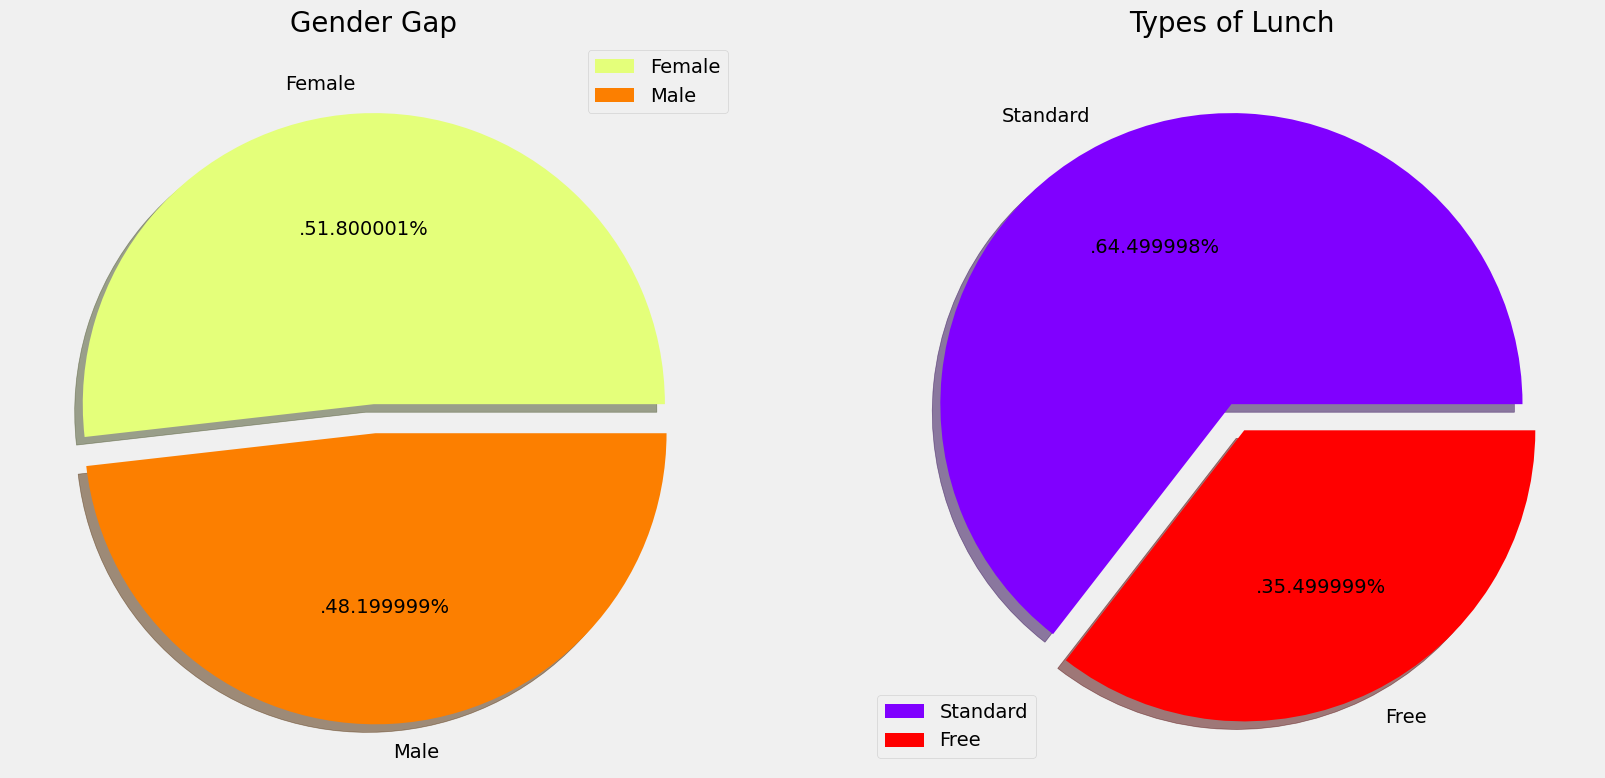

In [7]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = plt.cm.rainbow(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Types of Lunch', fontsize = 20)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

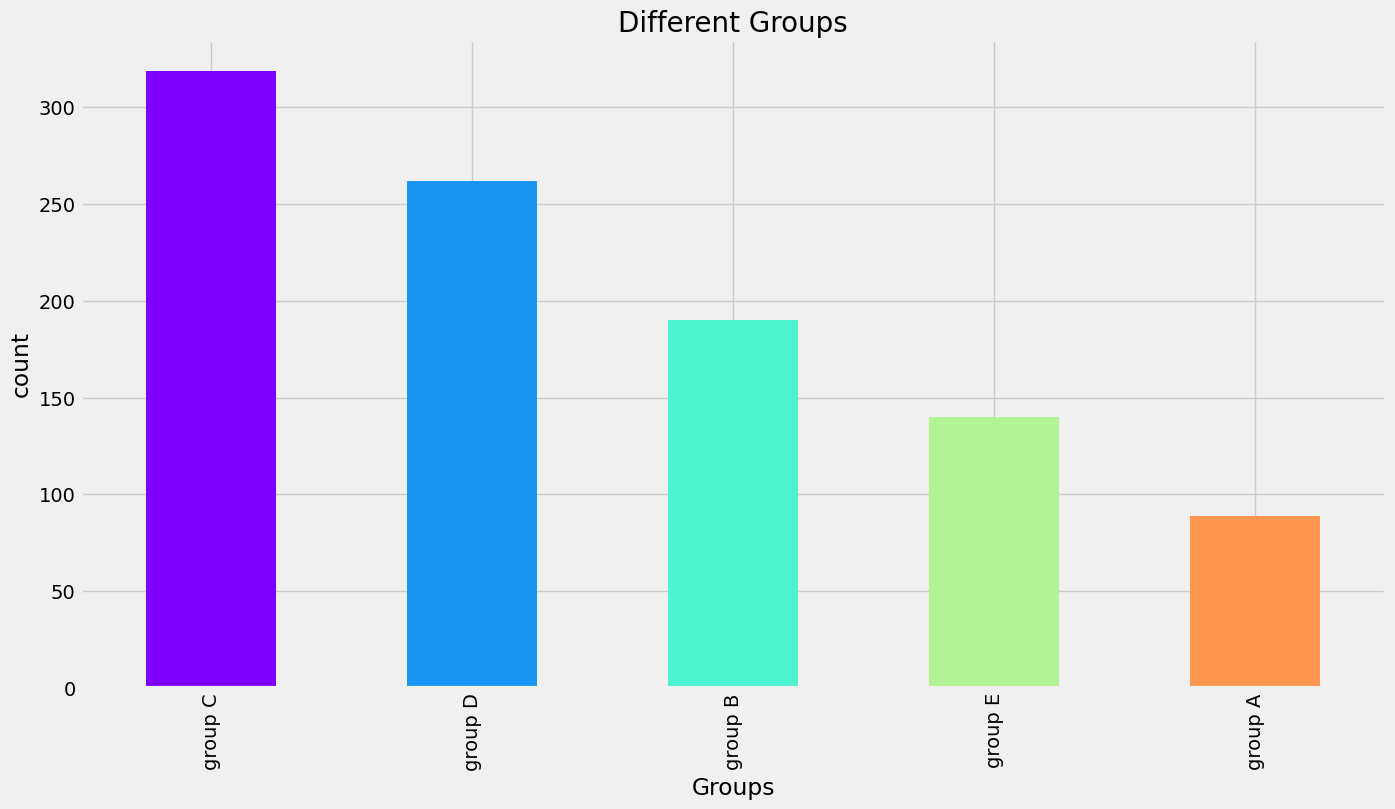

In [8]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.rainbow(np.linspace(0, 1, 6))
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Different Groups', fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

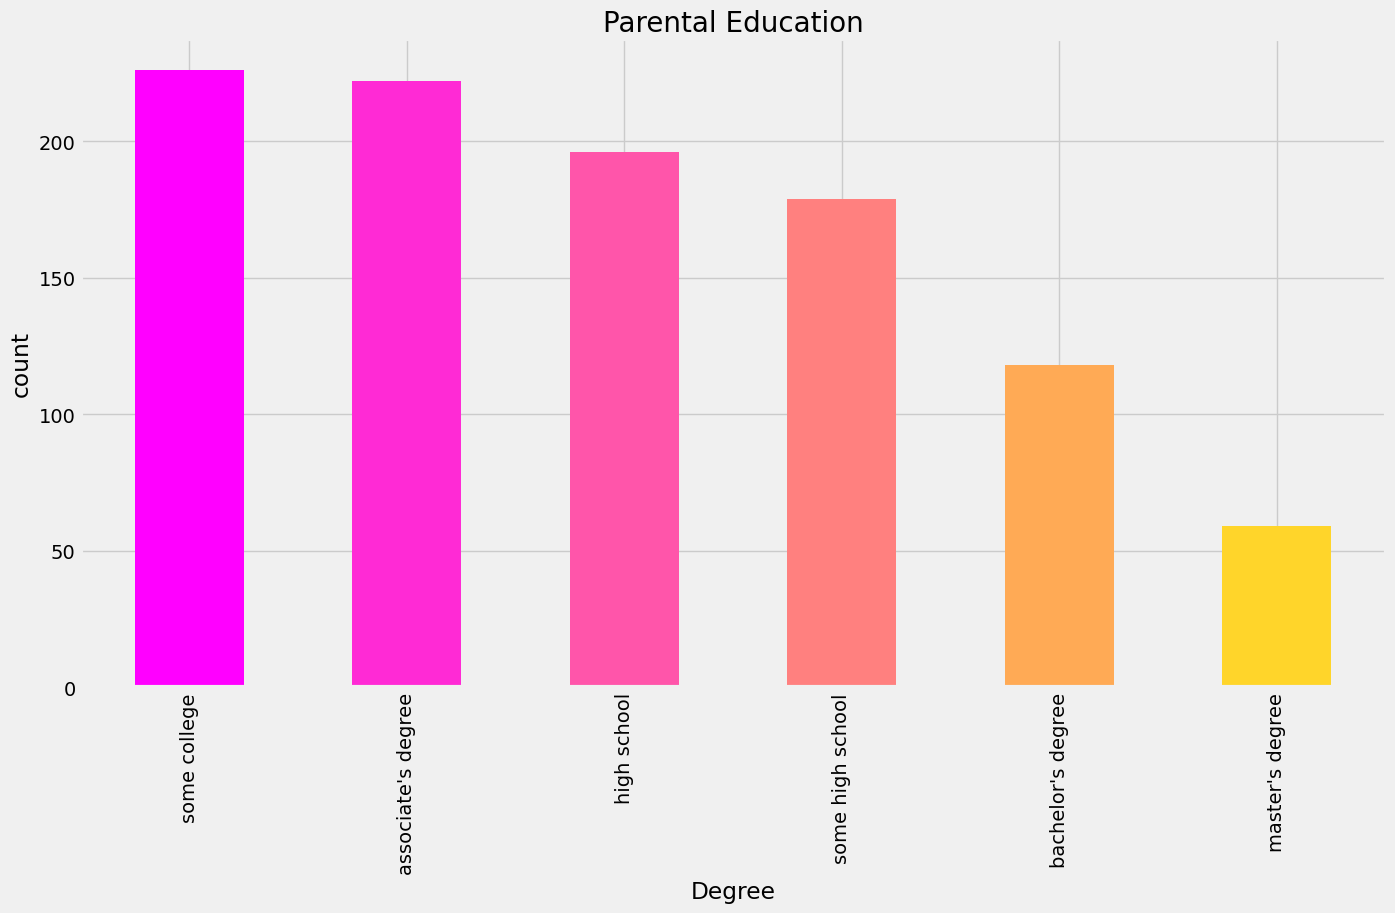

In [10]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.spring(np.linspace(0, 1, 7))
df['parental level of education'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Parental Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

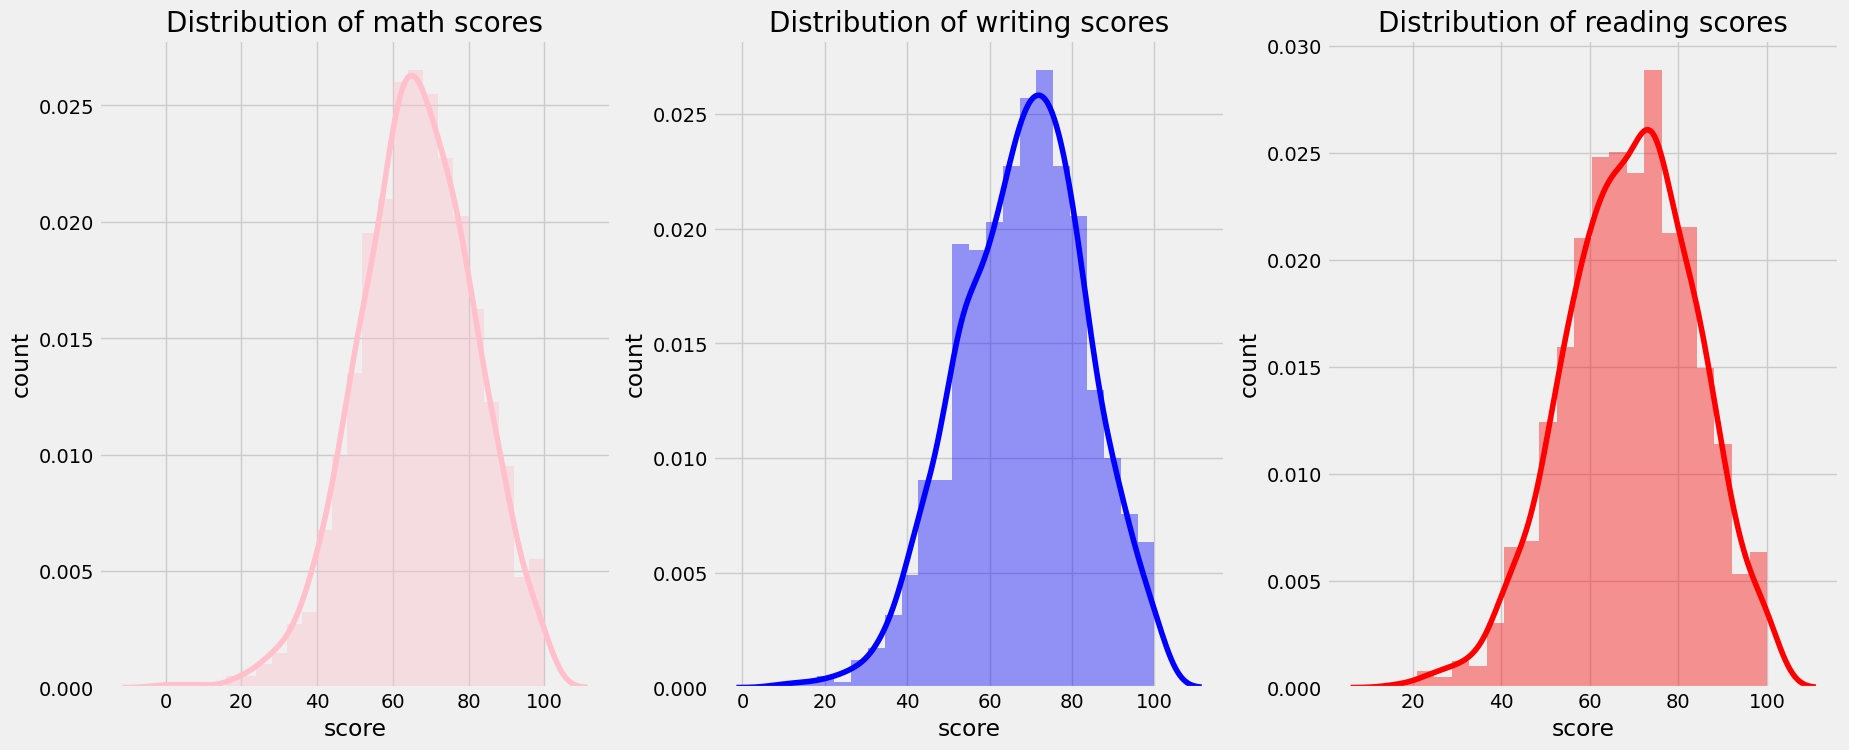

In [11]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(df['math score'], color = 'pink')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(df['writing score'], color = 'blue')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(df['reading score'], color = 'red')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()

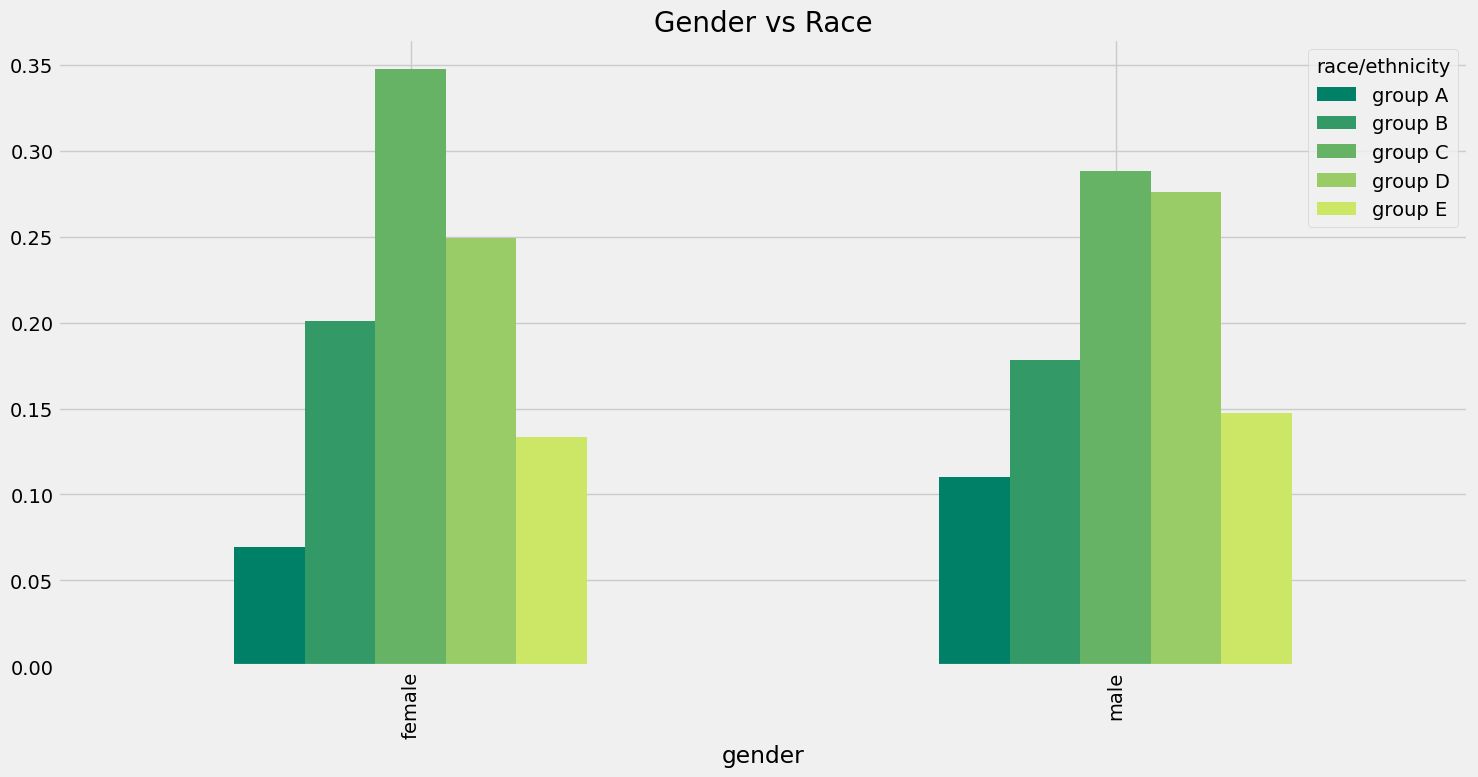

In [12]:
# gender vs race/etnicity 

x = pd.crosstab(df['gender'], df['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = False,
                                             figsize = (15, 8),
                                             color = plt.cm.summer(np.linspace(0, 1, 6)))

plt.title('Gender vs Race', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

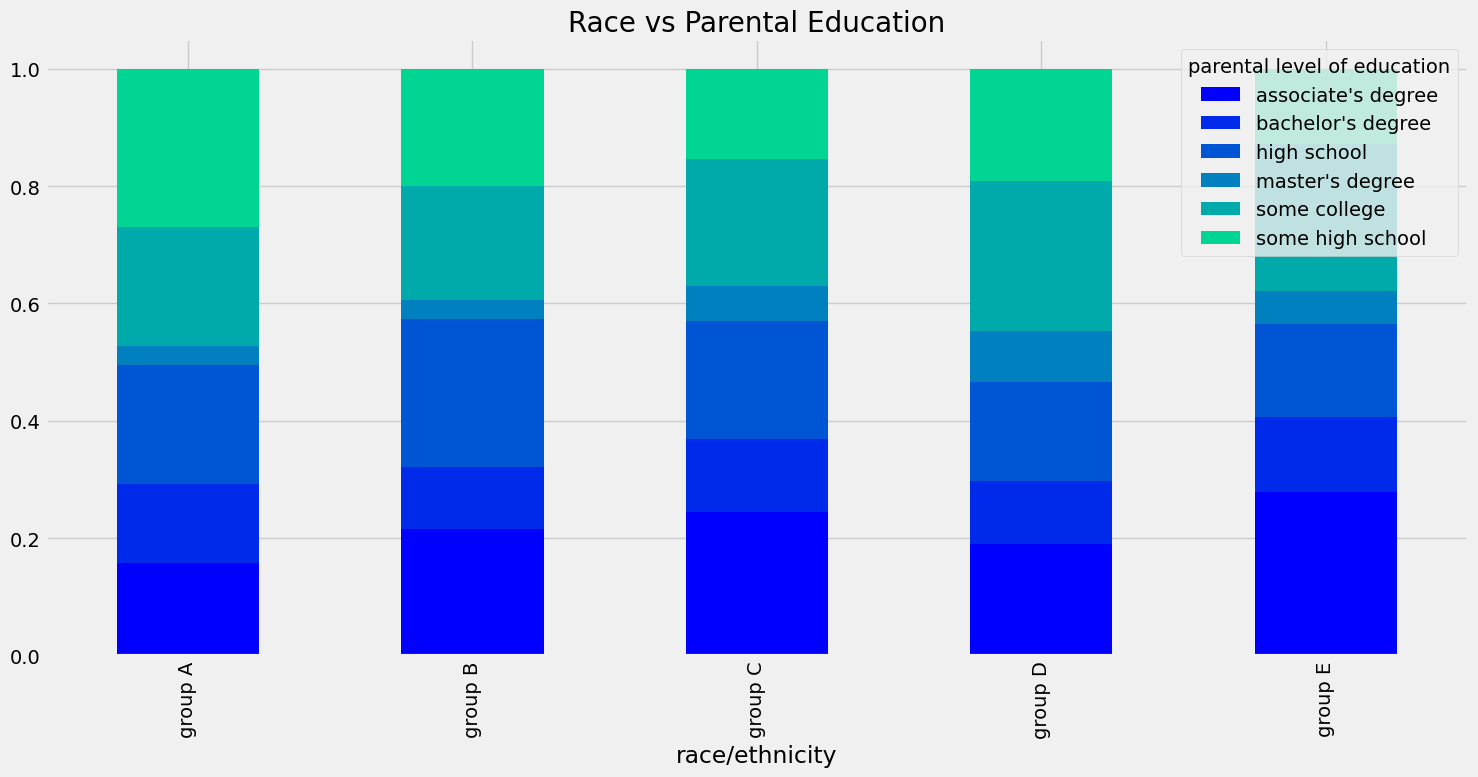

In [13]:
# comparison of race/ethnicity and parental level of education

x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = 'True',
                                             figsize = (15, 8),
                                             color = plt.cm.winter(np.linspace(0, 1, 7)))

plt.title('Race vs Parental Education', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.grid()
plt.show()

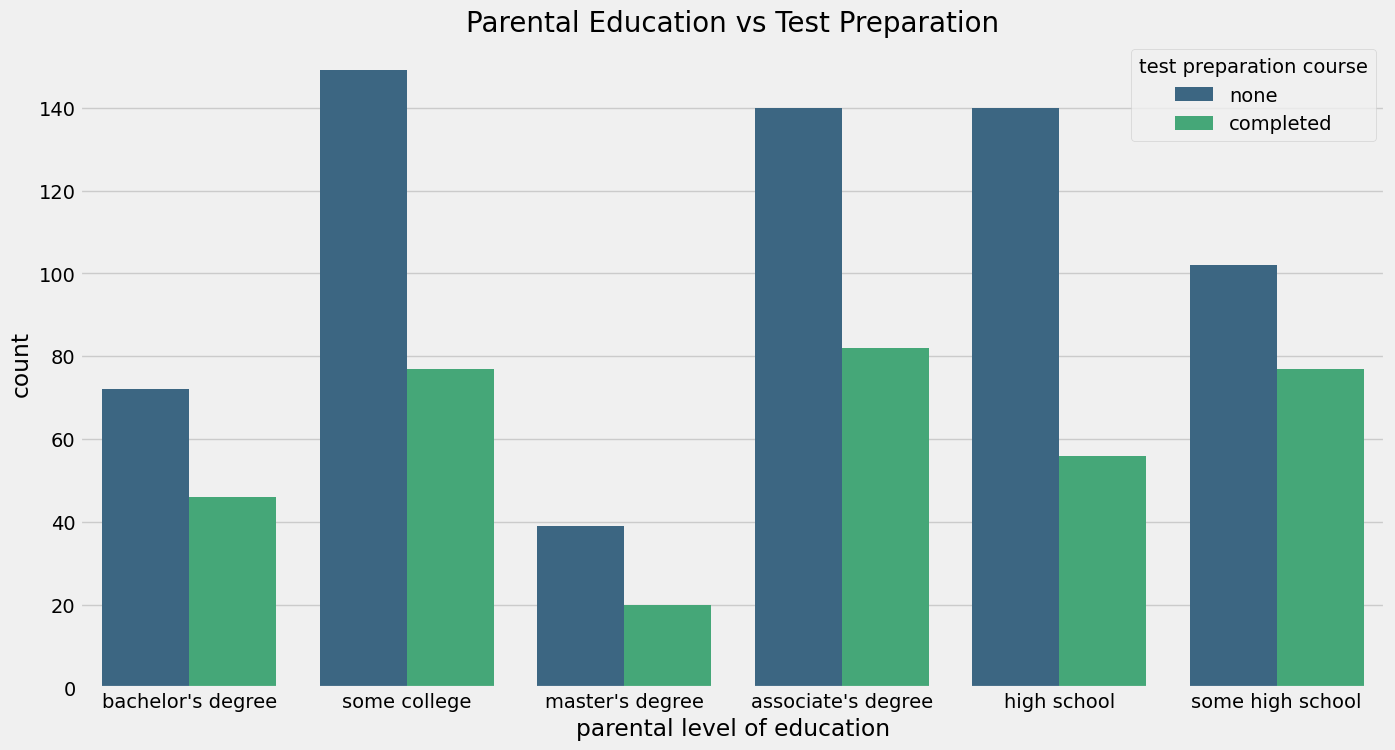

In [15]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x = 'parental level of education', data = df, hue = 'test preparation course', palette = 'viridis')
plt.title('Parental Education vs Test Preparation', fontsize = 20)
plt.show()

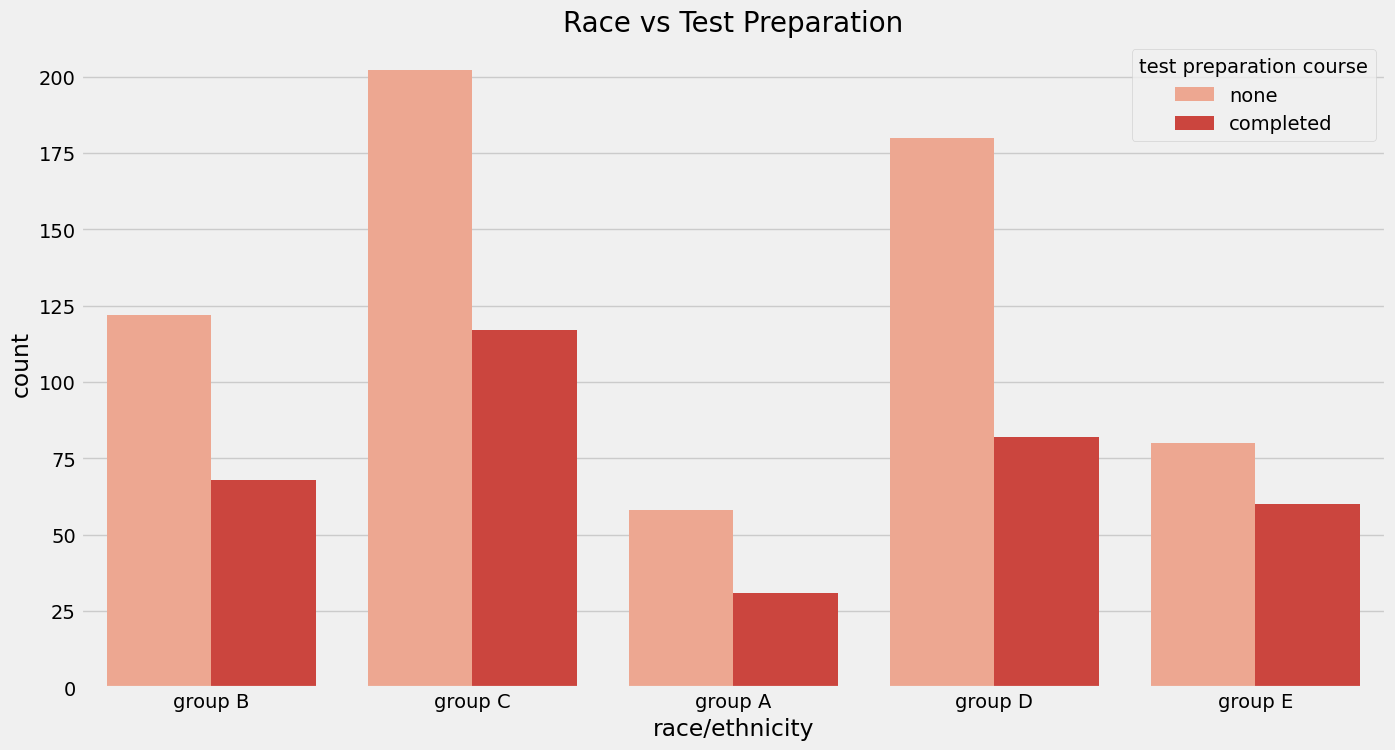

In [16]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = df,  hue = 'test preparation course', palette = 'Reds')
plt.title('Race vs Test Preparation', fontsize = 20)
plt.show()

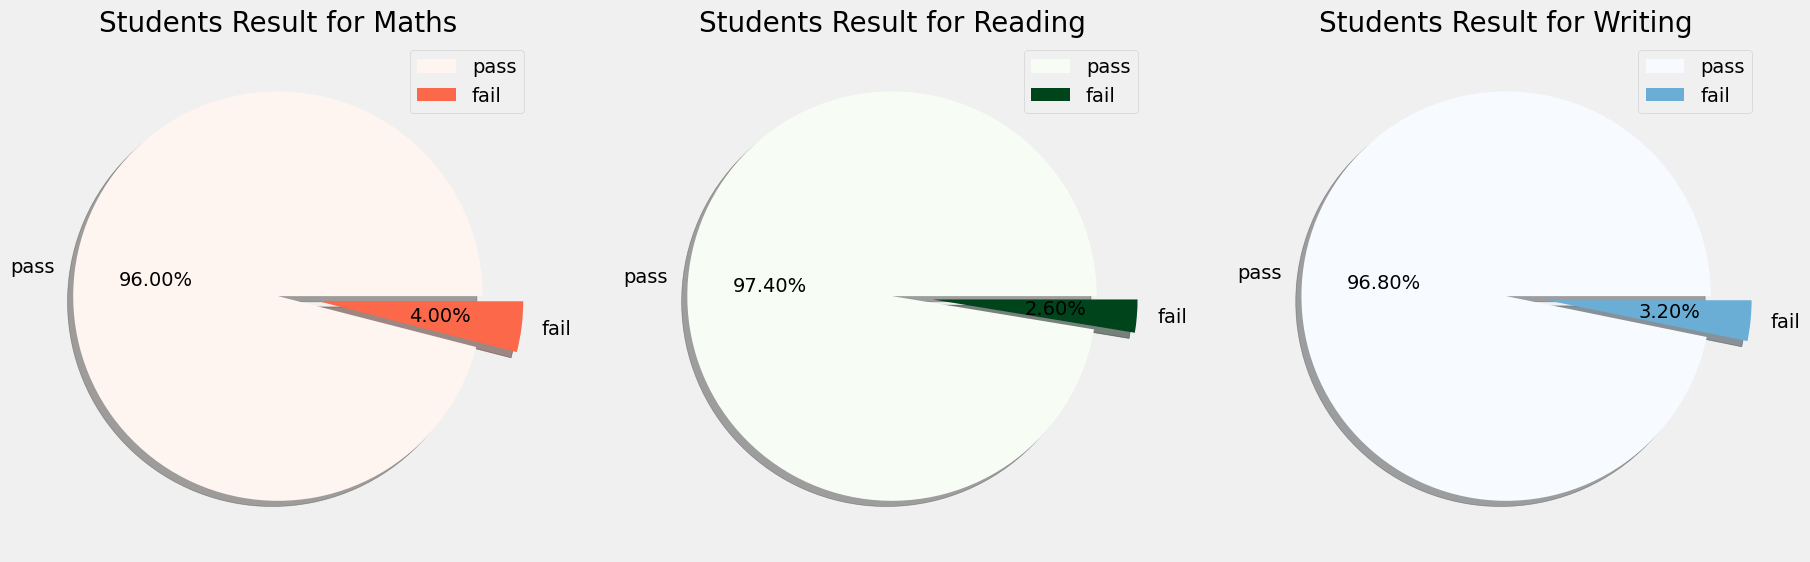

In [17]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40
plt.rcParams['figure.figsize'] = (20, 10)

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')

# pie chart to represent the ratio of pass and fail status between the students

size = df['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Maths', fontsize = 20)
plt.legend()

size = df['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 2))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Reading', fontsize = 20)
plt.legend()

size = df['pass_writing'].value_counts()
colors = plt.cm.Blues(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Students Result for Writing', fontsize = 20)
plt.legend()
plt.show()




C:\Users\YASH\AppData\Local\Temp\ipykernel_9880\1262260850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'][i] = ceil(df['percentage'][i])
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function wit

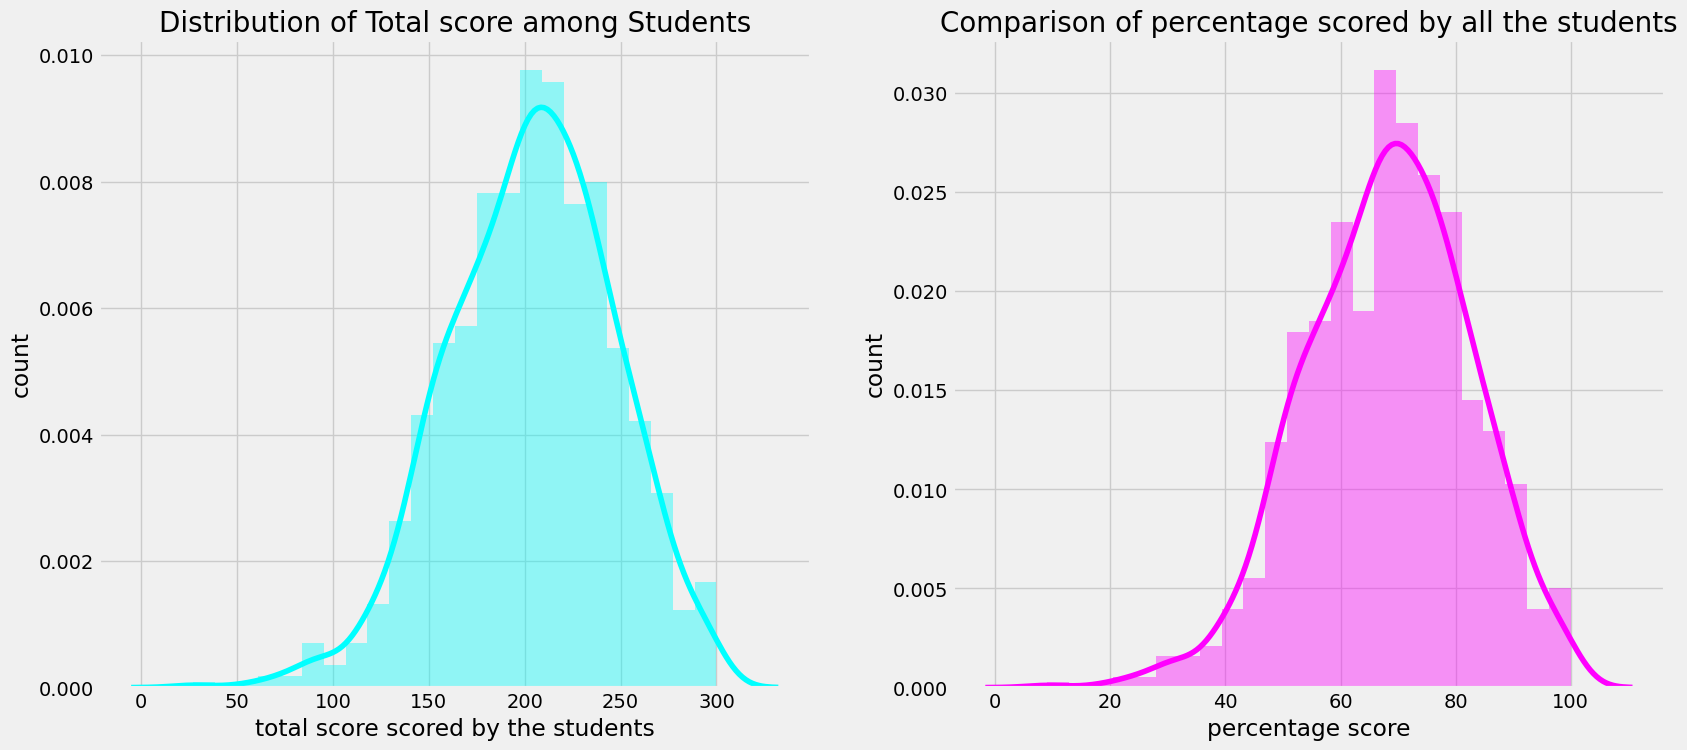

In [18]:
# computing the total score for each student

from math import * 
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.distplot(df['total_score'], color = 'cyan')
plt.title('Distribution of Total score among Students', fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.distplot(df['percentage'], color = 'magenta')
plt.title('Comparison of percentage scored by all the students', fontsize = 20)
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


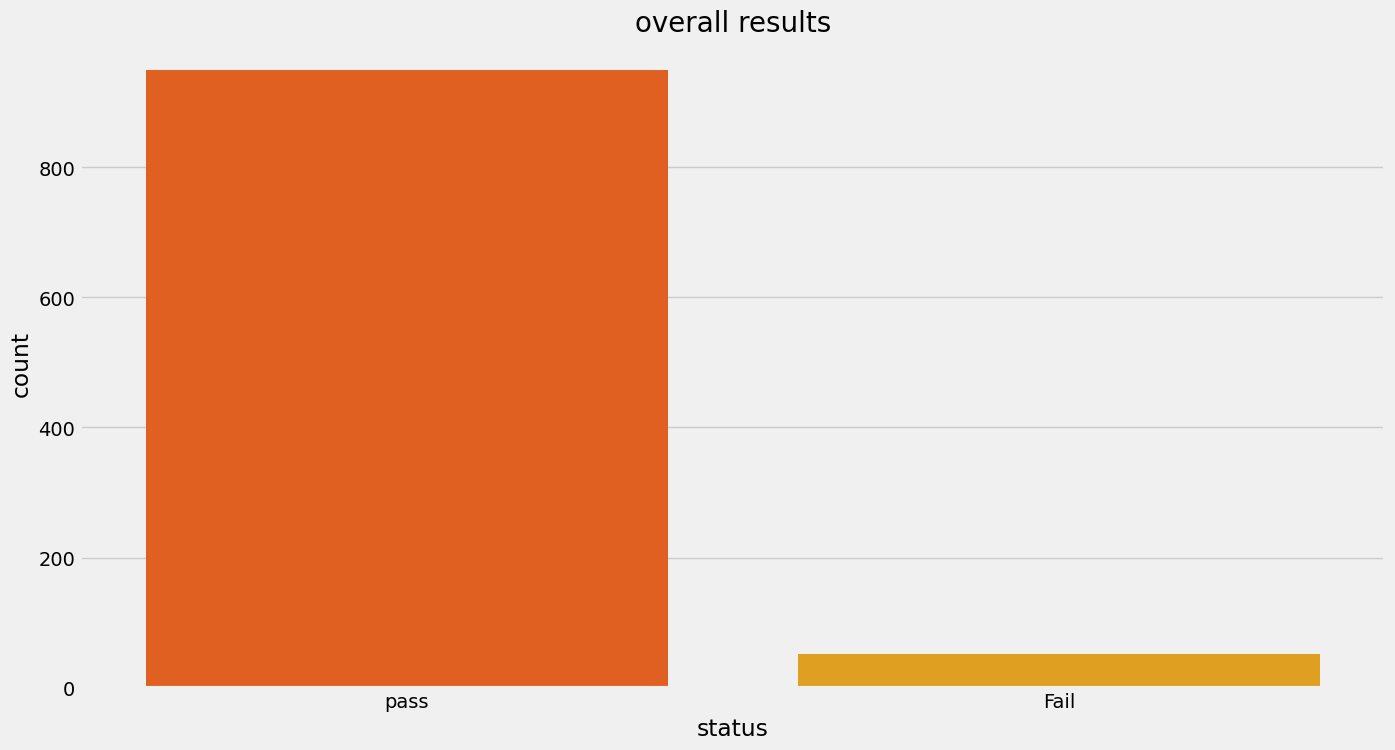

In [19]:
# checking which student is fail overall

df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['status'], palette = 'autumn')
plt.title('overall results', fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

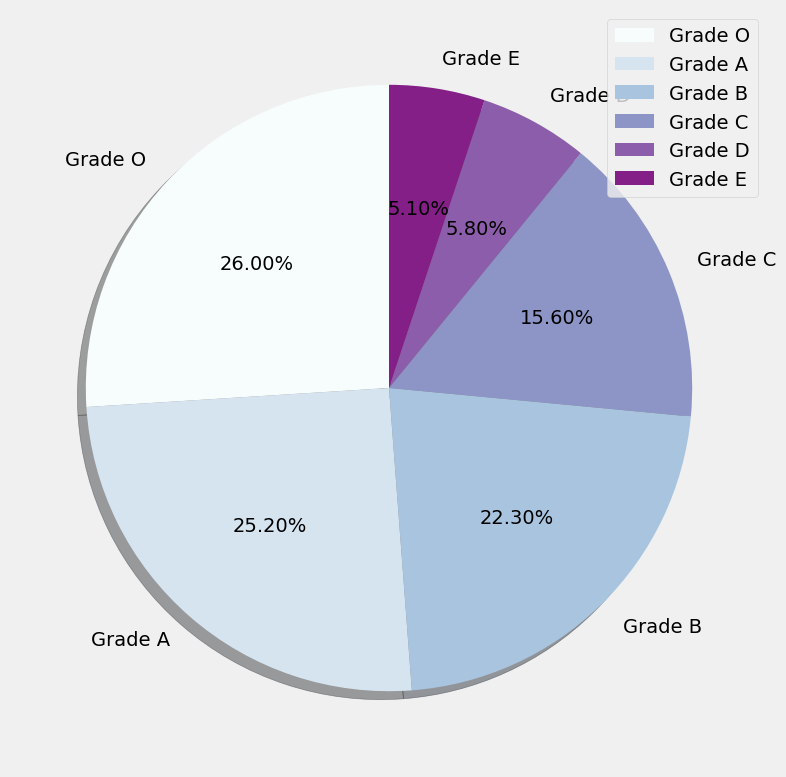

In [20]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade O', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = df['grades'].value_counts()
colors = plt.cm.BuPu(np.linspace(0, 1, 7))
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

plt.pie(sizes, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.legend(loc = 'upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

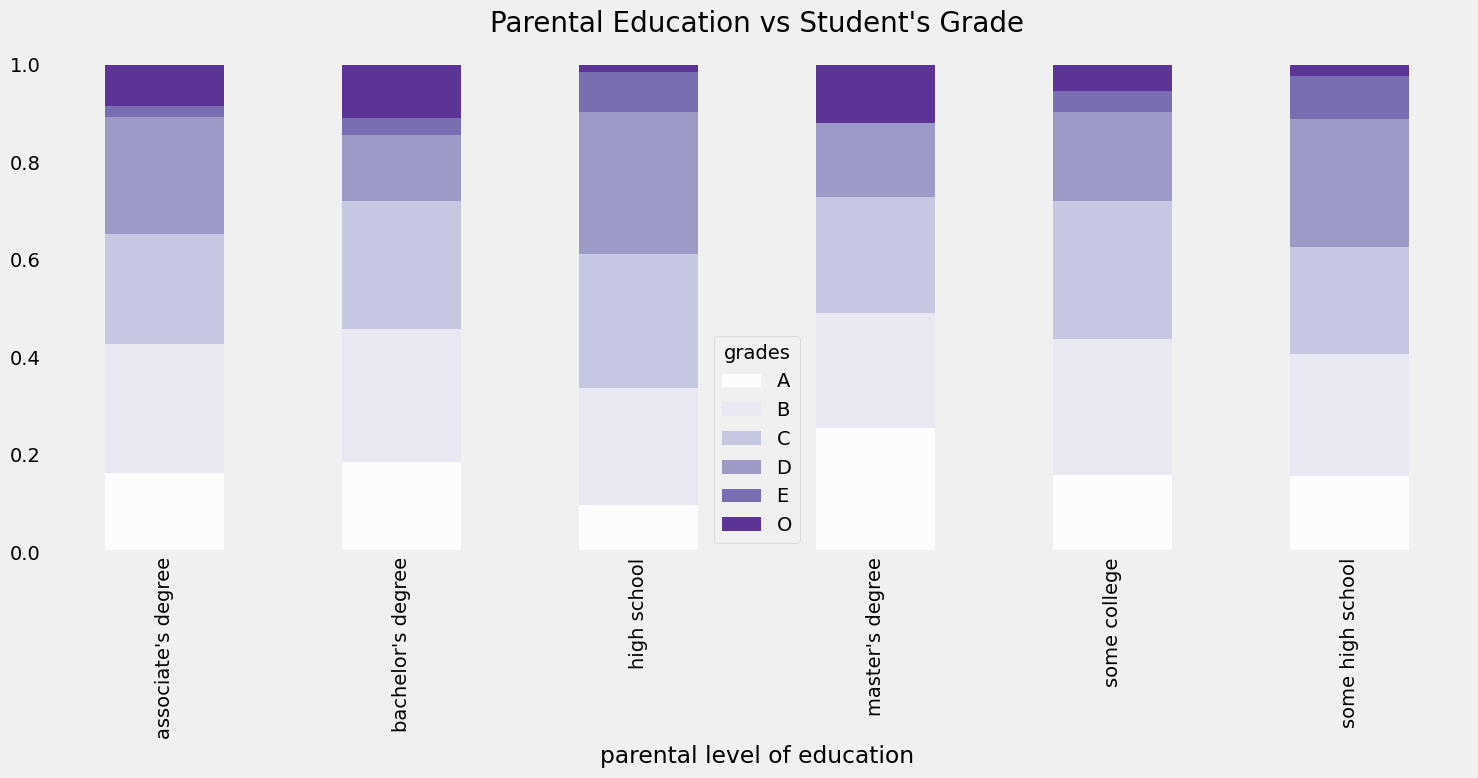

In [21]:
# comparison parent's degree and their corresponding grades

x = pd.crosstab(df['parental level of education'], df['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                             stacked = True,
                                             figsize = (15, 8),
                                             color = plt.cm.Purples(np.linspace(0, 1, 7)))

plt.title("Parental Education vs Student's Grade", fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

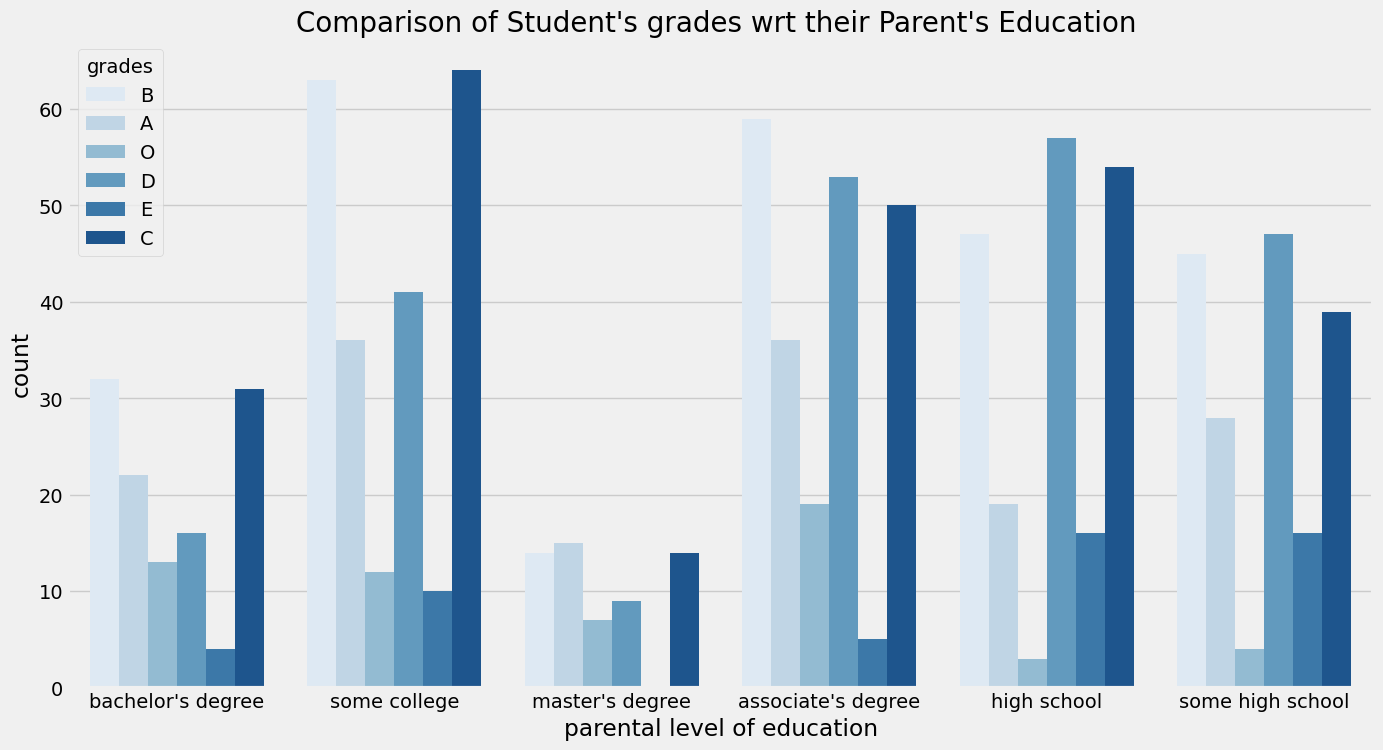

In [22]:
# for better visualization we will plot it again using seaborn

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x = df['parental level of education'], data = df, hue = df['grades'], palette = 'Blues')
plt.title("Comparison of Student's grades wrt their Parent's Education ", fontsize = 20)
plt.show()

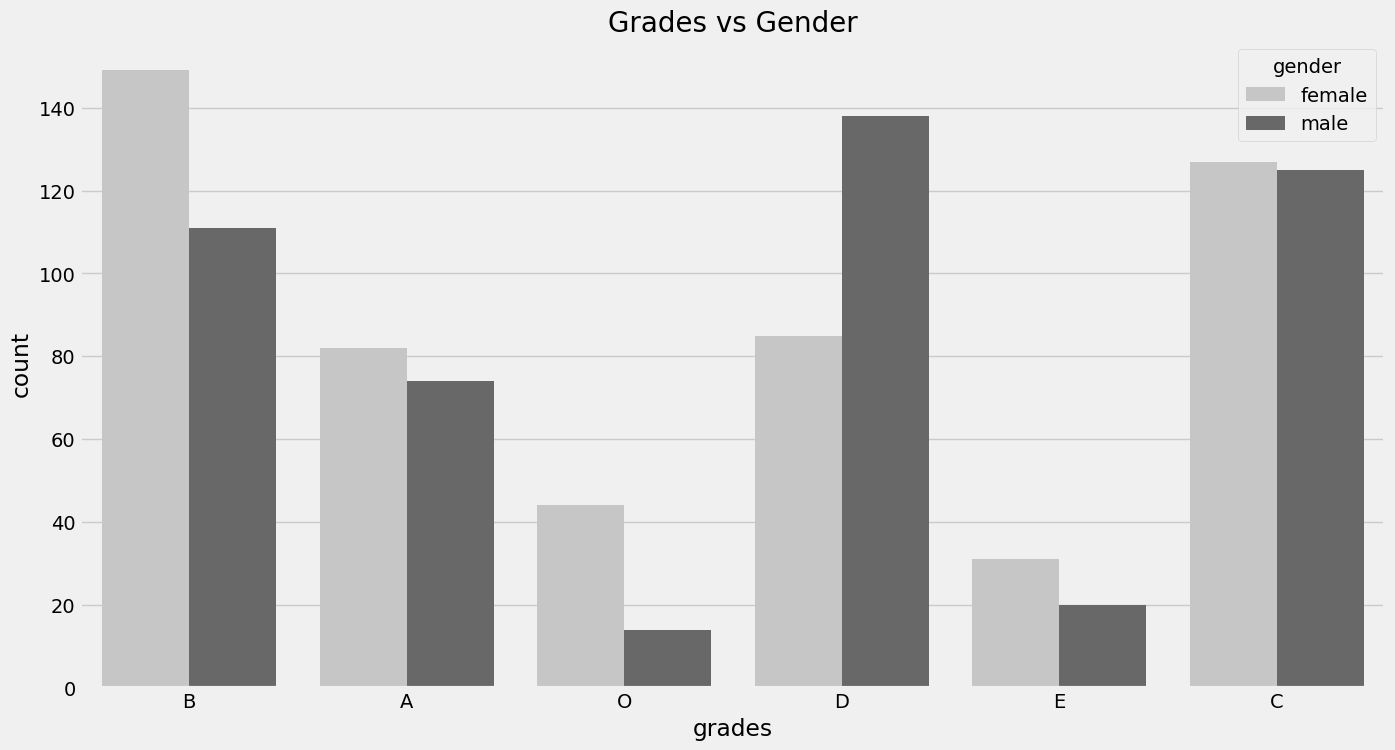

In [20]:
# comparing the distribution of grades among males and females

sns.countplot(x = df['grades'], data = df, hue = df['gender'], palette = 'Greys')
plt.title('Grades vs Gender', fontsize = 20)
plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

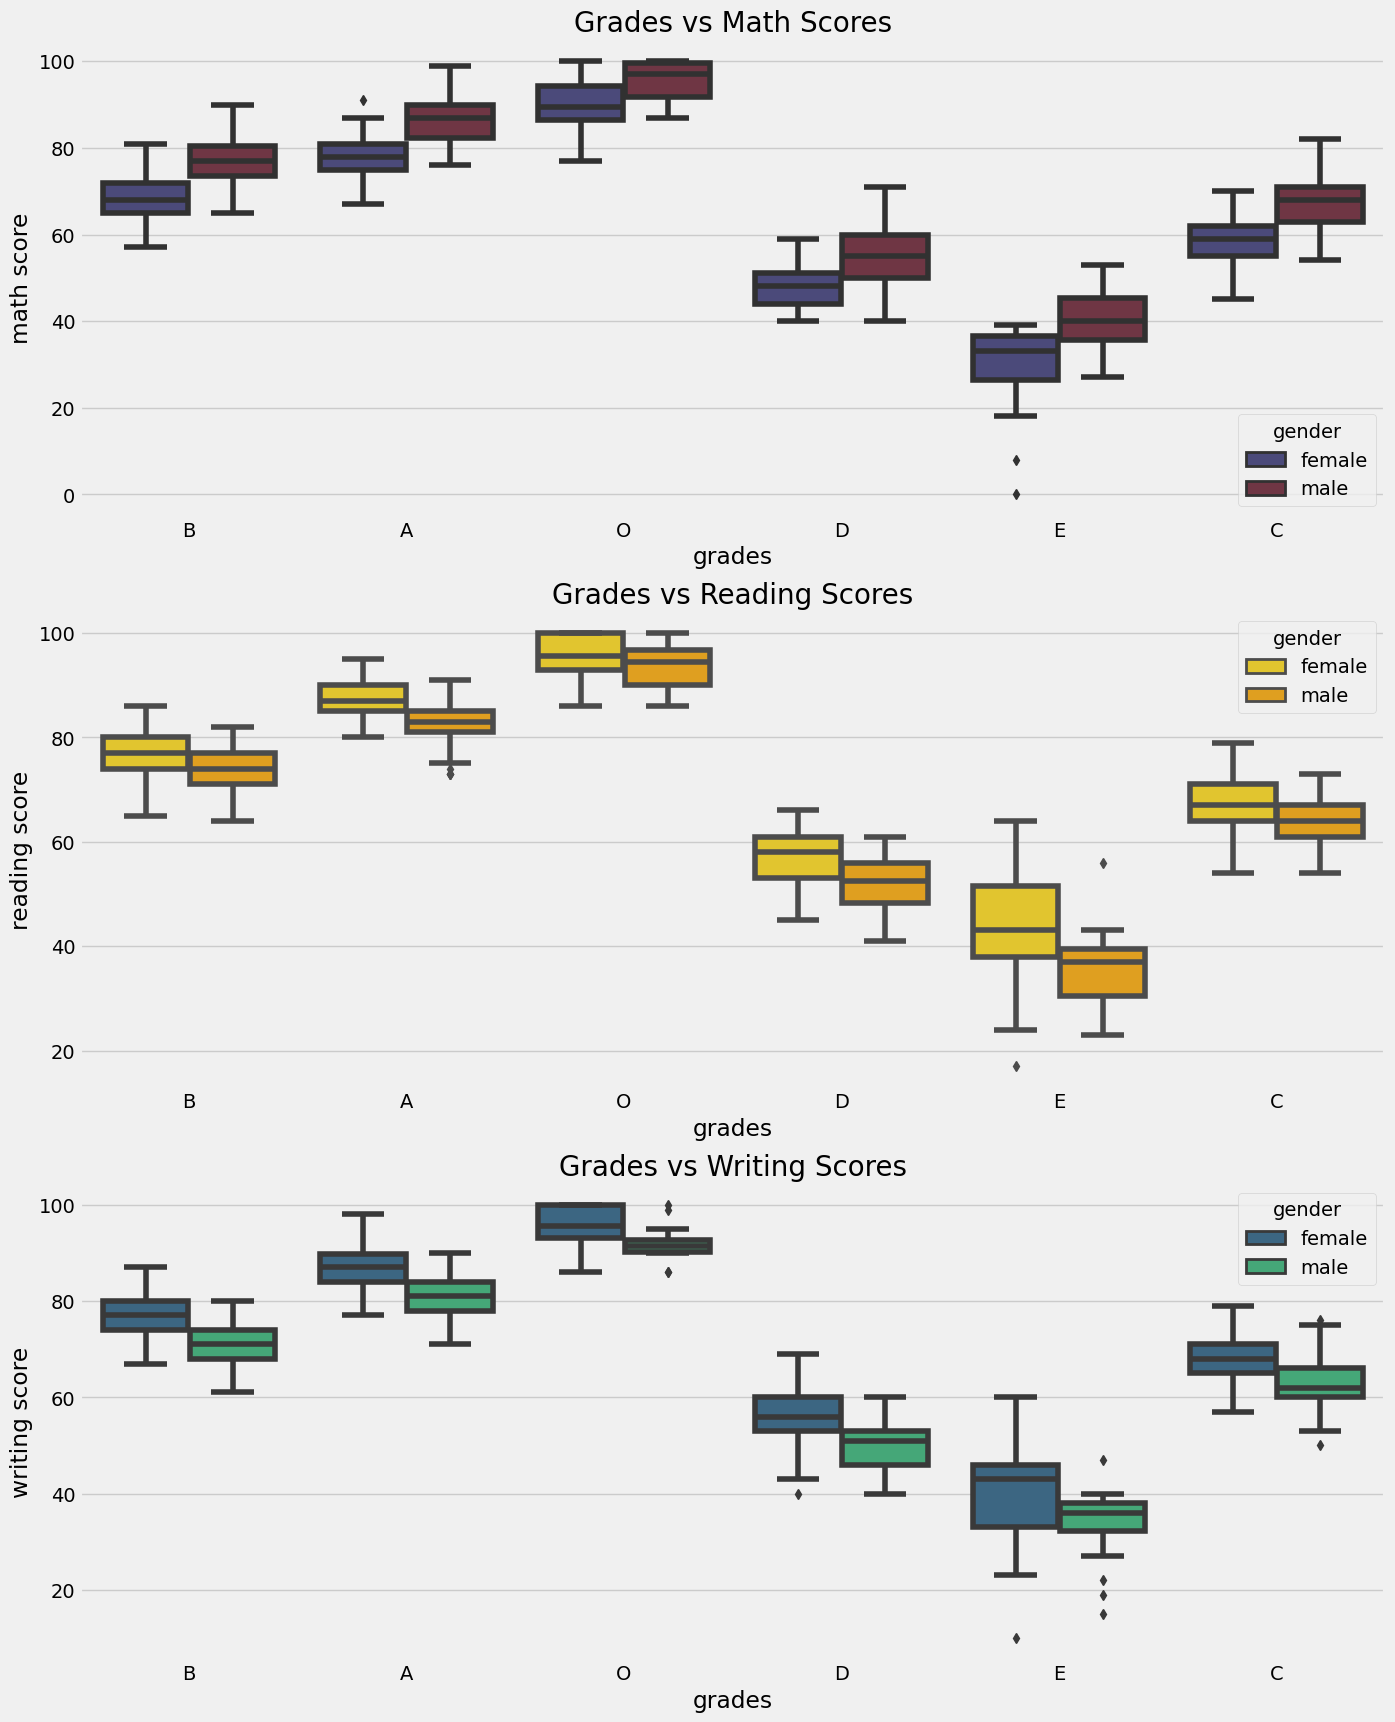

In [23]:
plt.rcParams['figure.figsize'] = (15, 20)

plt.subplot(3, 1, 1)
sns.boxplot(df['grades'], df['math score'], hue = df['gender'], palette = 'icefire')
plt.title('Grades vs Math Scores', fontsize = 20)

plt.subplot(3, 1, 2)
sns.boxplot(df['grades'], df['reading score'], hue = df['gender'], palette = 'Wistia')
plt.title('Grades vs Reading Scores', fontsize = 20)

plt.subplot(3, 1, 3)
sns.boxplot(df['grades'], df['writing score'], hue = df['gender'], palette = 'viridis')
plt.title('Grades vs Writing Scores', fontsize = 20)

plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


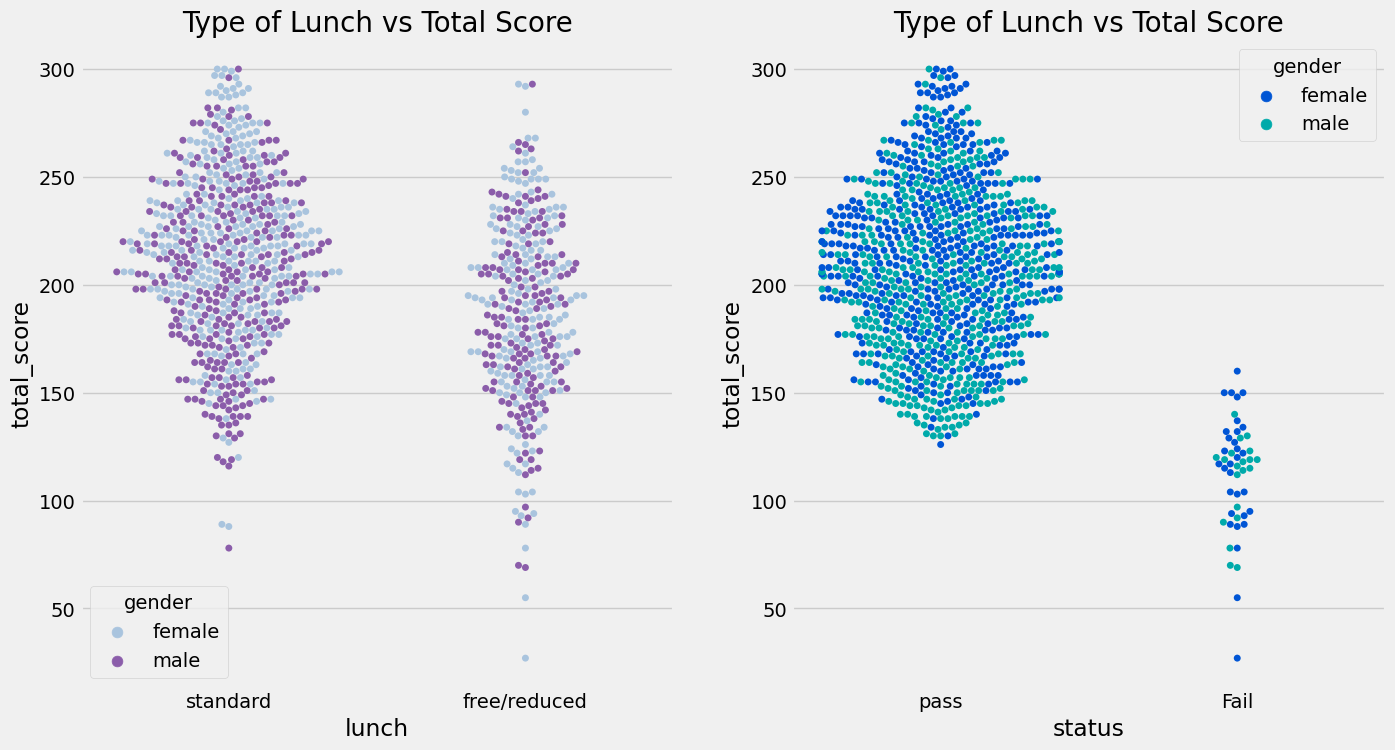

In [24]:
# lunch type vs total marks obtained by students

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1, 2, 1)
sns.swarmplot(df['lunch'], df['total_score'], hue = df['gender'], palette = 'BuPu')
plt.title('Type of Lunch vs Total Score', fontsize = 20)

plt.subplot(1, 2, 2)
sns.swarmplot(df['status'], df['total_score'], hue = df['gender'], palette = 'winter')
plt.title('Type of Lunch vs Total Score', fontsize = 20)

plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

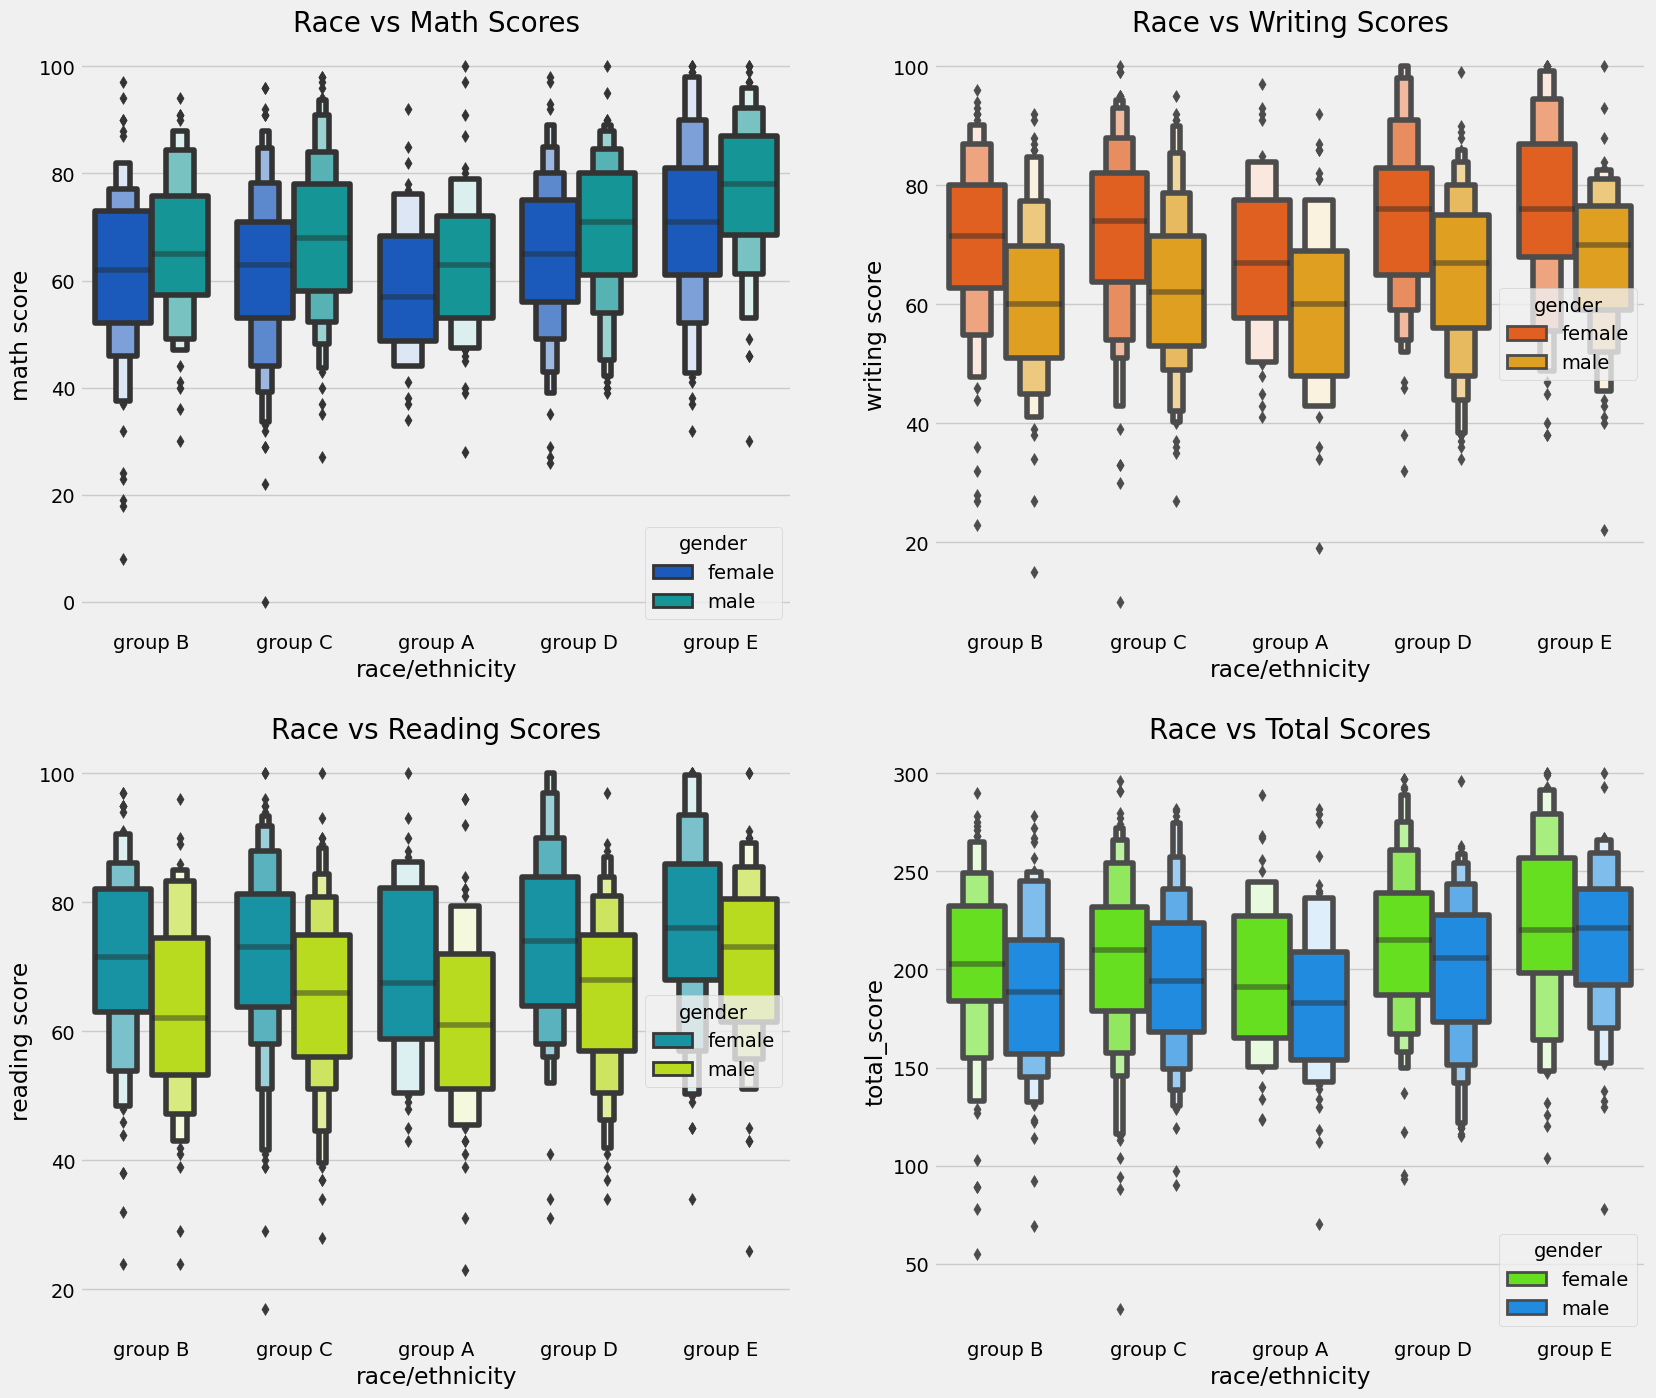

In [25]:
# race vs grades

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.boxenplot(df['race/ethnicity'], df['math score'], hue = df['gender'], palette = 'winter')
plt.title('Race vs Math Scores', fontsize = 20)

plt.subplot(2, 2, 2)
sns.boxenplot(df['race/ethnicity'], df['writing score'], hue = df['gender'], palette = 'autumn')
plt.title('Race vs Writing Scores', fontsize = 20)

plt.subplot(2, 2, 3)
sns.boxenplot(df['race/ethnicity'], df['reading score'], hue = df['gender'], palette = 'nipy_spectral')
plt.title('Race vs Reading Scores', fontsize = 20)

plt.subplot(2, 2, 4)
sns.boxenplot(df['race/ethnicity'], df['total_score'], hue = df['gender'], palette = 'gist_rainbow')
plt.title('Race vs Total Scores', fontsize = 20)

plt.show()

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Race vs Percentage wrt Types of Lunch')

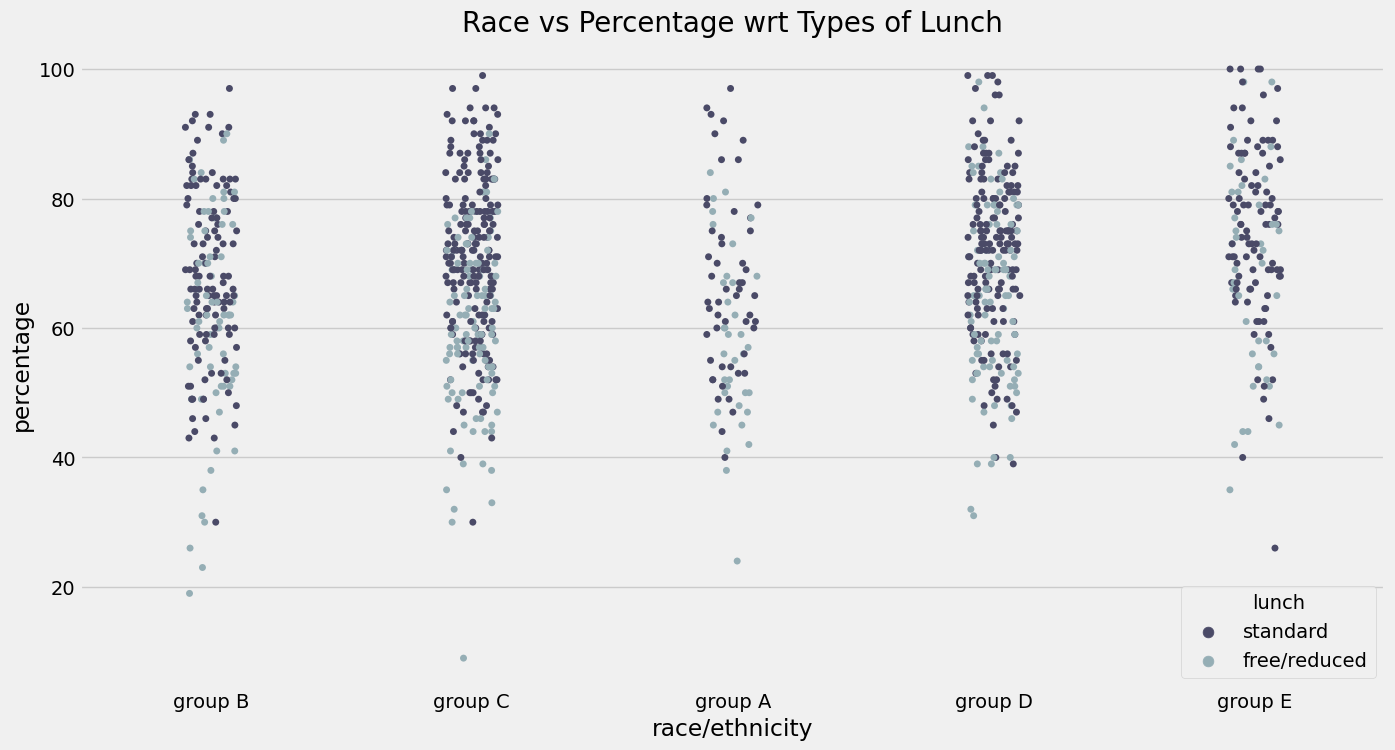

In [26]:
# race vs gender vs

plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(df['race/ethnicity'], df['percentage'], hue = df['lunch'], jitter = True, palette = 'bone')
plt.title('Race vs Percentage wrt Types of Lunch', fontsize = 20)

Text(0.5, 1.0, 'Correlations between the attributes')

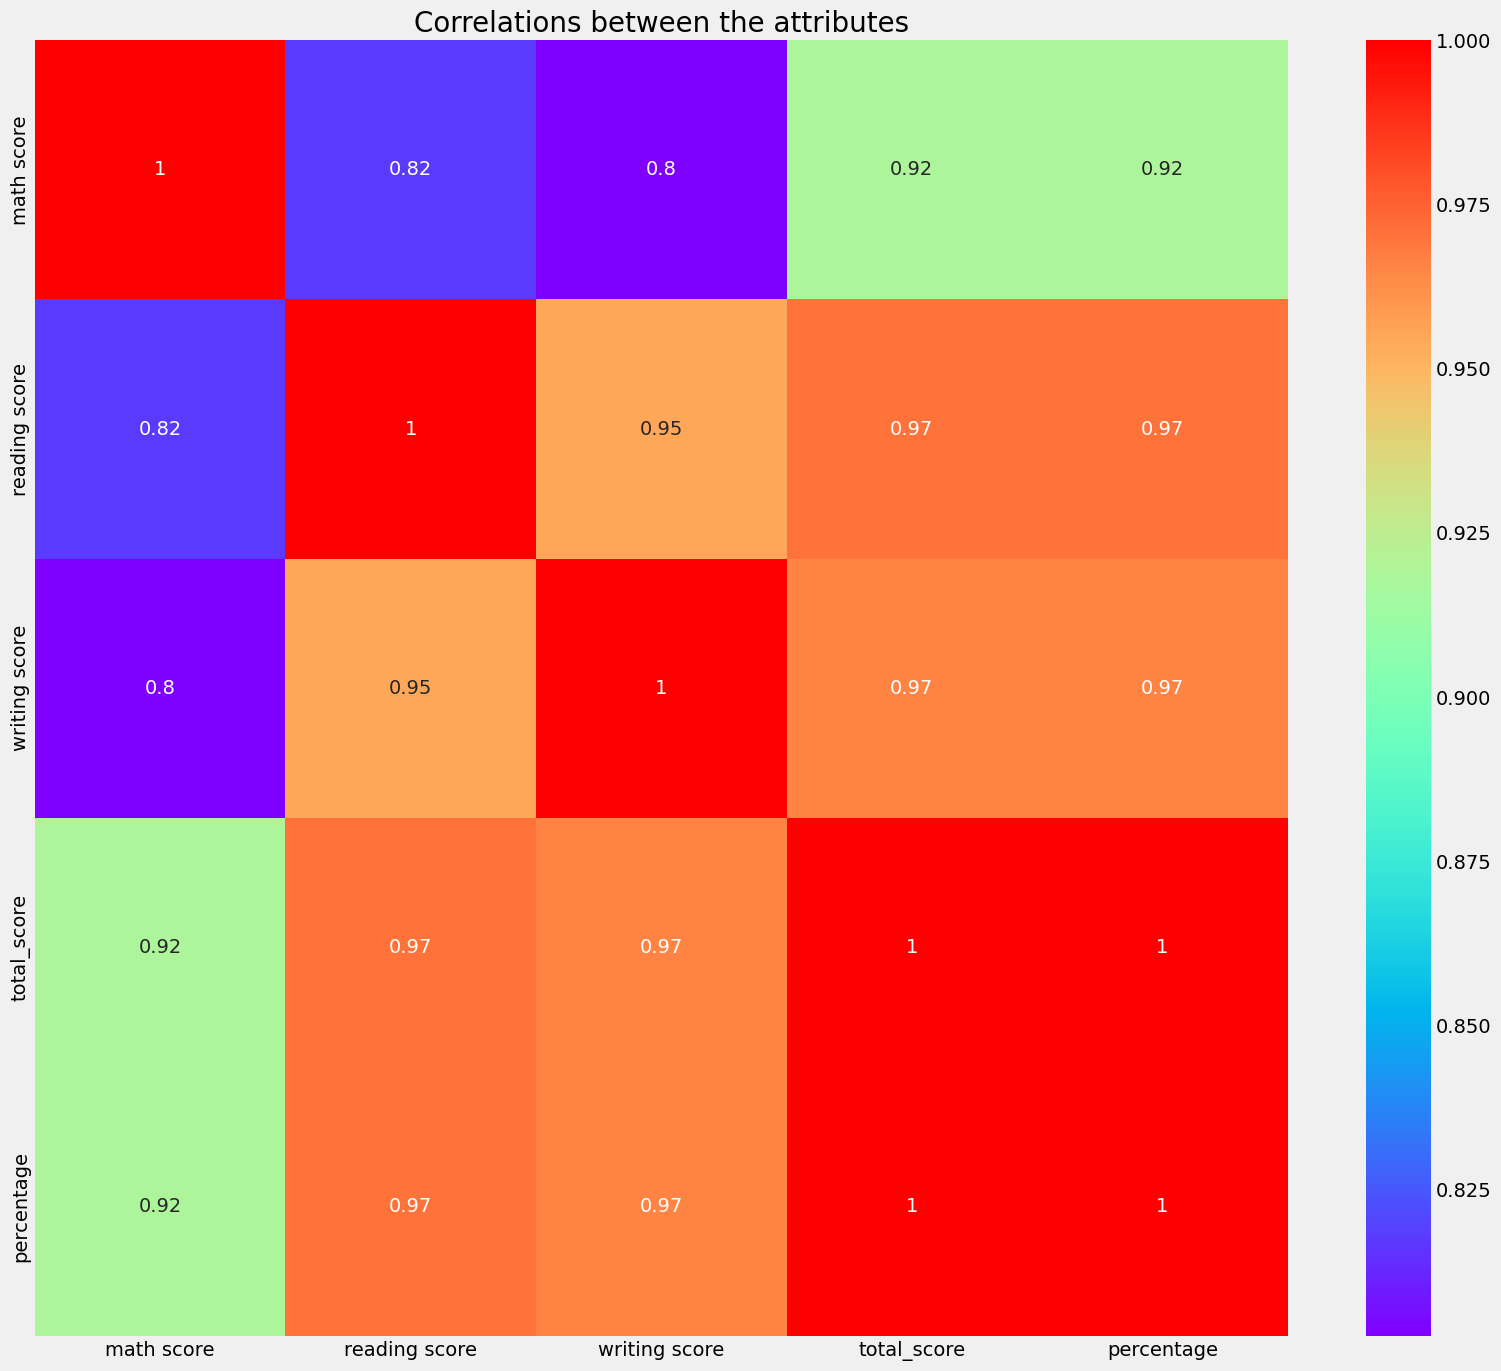

In [27]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 16)
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True)
plt.title('Correlations between the attributes', fontsize = 20)

# Dataset Preprocessing

In [28]:
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['lunch'] = le.fit_transform(df['lunch'])
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['gender'] = le.fit_transform(df['gender'])
df['pass_math'] = le.fit_transform(df['pass_math'])
df['pass_reading'] = le.fit_transform(df['pass_reading'])
df['pass_writing'] = le.fit_transform(df['pass_writing'])
df['status'] = le.fit_transform(df['status'])
df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)

In [30]:
# splitting the dependent and independent variables

x = df.iloc[:,:14]
y = df.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [31]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [32]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


# Modelling

# 1.Logistic Regression

In [33]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8546666666666667
Testing Accuracy : 0.82


**Confusion Matrix**

<AxesSubplot:>

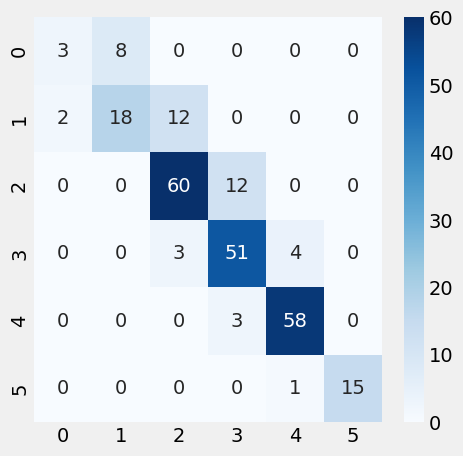

In [34]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

**Classification Report**

In [35]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.69      0.56      0.62        32
           2       0.80      0.83      0.82        72
           3       0.77      0.88      0.82        58
           4       0.92      0.95      0.94        61
           5       1.00      0.94      0.97        16

    accuracy                           0.82       250
   macro avg       0.80      0.74      0.76       250
weighted avg       0.81      0.82      0.81       250



# 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 100)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


**Confusion Matrix**

<AxesSubplot:>

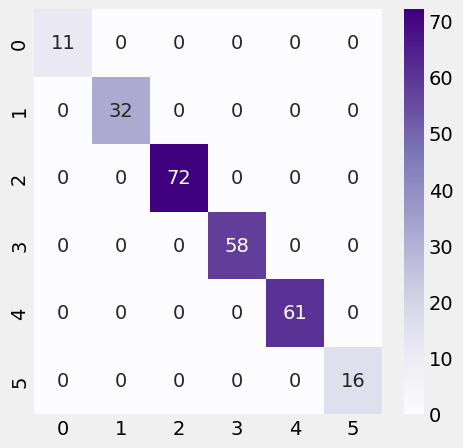

In [37]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Purples')

**Classification Report**

In [38]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        16

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



**Cross Val**

In [39]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


**Most Important Features**

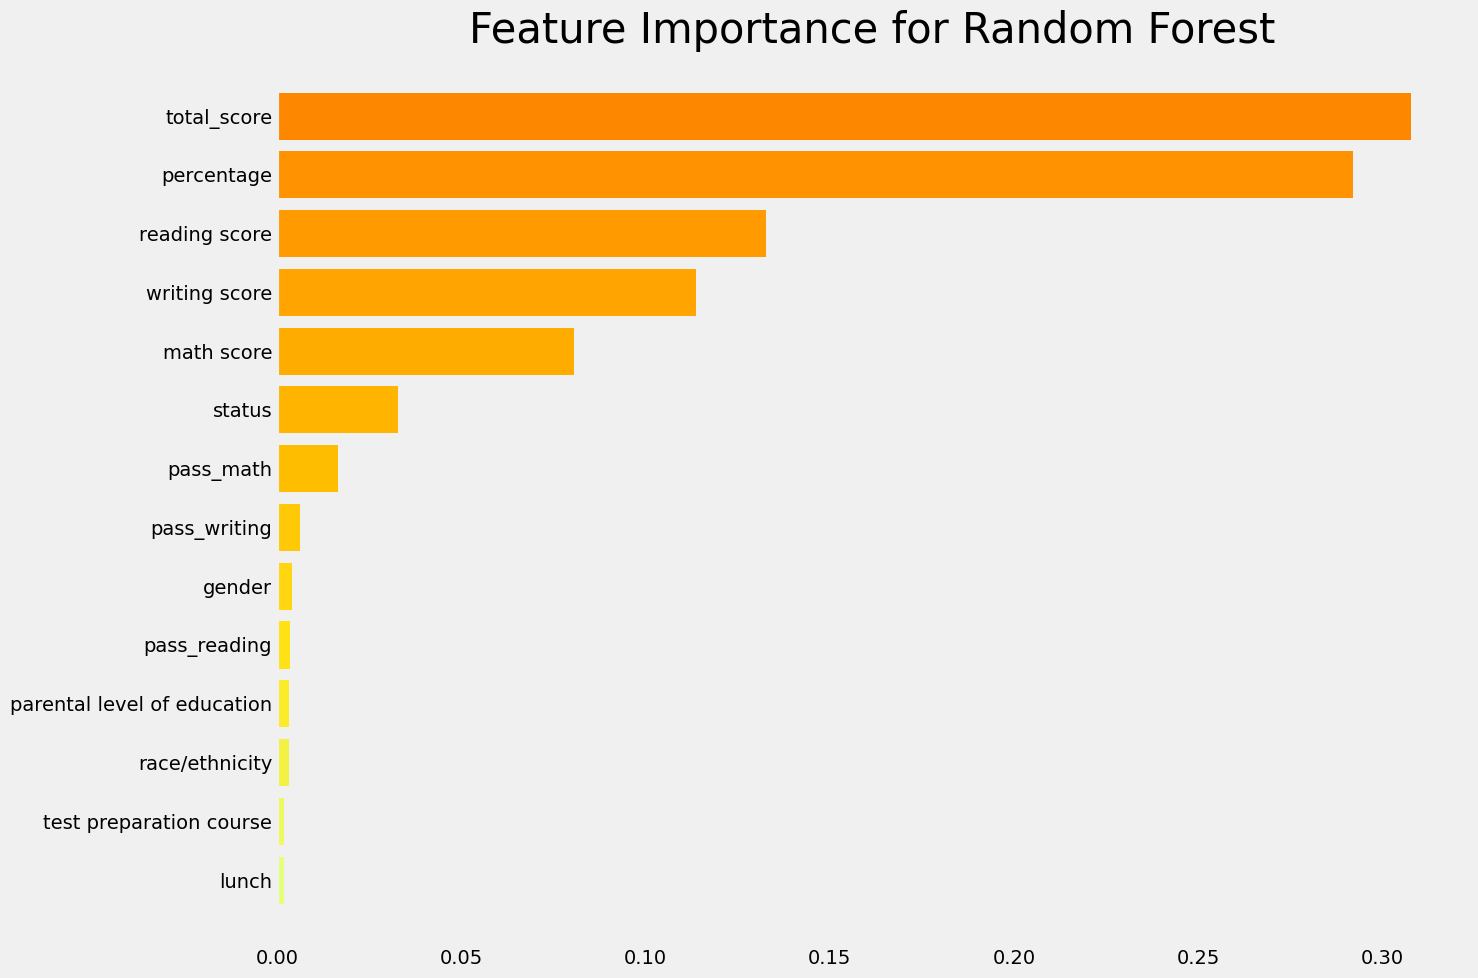

In [40]:
features = df.columns
importance = model.feature_importances_
indices = np.argsort(importance)
color = plt.cm.Wistia(np.linspace(0, 1, 15))

plt.rcParams['figure.figsize'] = (15, 10)
plt.barh(range(len(indices)), importance[indices], color = color)
plt.yticks(range(len(indices)), features[indices])
plt.title('Feature Importance for Random Forest', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()